# Overview
- とりあえずEDA

# Const

In [100]:
PATH_TRAIN = '../data_ignore/input/train_features.csv'
PATH_TRAIN_SCORED = '../data_ignore/input/train_targets_scored.csv'
PATH_TRAIN_NONSCORED = '../data_ignore/input/train_targets_nonscored.csv'
PATH_SUB = '../data_ignore/input/sample_submission.csv'
PATH_TEST = '../data_ignore/input/test_features.csv'

# Import everything I need :)

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# My function

# Preparation

set

In [102]:
sns.set()
pd.set_option('display.max_columns', 1000)

<br>

load datasets

In [103]:
train_features = pd.read_csv(PATH_TRAIN)
train_scored = pd.read_csv(PATH_TRAIN_SCORED)
train_nonscored = pd.read_csv(PATH_TRAIN_NONSCORED)
sub = pd.read_csv(PATH_SUB)
test_features = pd.read_csv(PATH_TEST)

# EDA

train_features

In [104]:
train_features.shape

(23814, 876)

In [105]:
train_features.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50,g-51,g-52,g-53,g-54,g-55,g-56,g-57,g-58,g-59,g-60,g-61,g-62,g-63,g-64,g-65,g-66,g-67,g-68,g-69,g-70,g-71,g-72,g-73,g-74,g-75,g-76,g-77,g-78,g-79,g-80,g-81,g-82,g-83,g-84,g-85,g-86,g-87,g-88,g-89,g-90,g-91,g-92,g-93,g-94,g-95,g-96,g-97,g-98,g-99,g-100,g-101,g-102,g-103,g-104,g-105,g-106,g-107,g-108,g-109,g-110,g-111,g-112,g-113,g-114,g-115,g-116,g-117,g-118,g-119,g-120,g-121,g-122,g-123,g-124,g-125,g-126,g-127,g-128,g-129,g-130,g-131,g-132,g-133,g-134,g-135,g-136,g-137,g-138,g-139,g-140,g-141,g-142,g-143,g-144,g-145,g-146,g-147,g-148,g-149,g-150,g-151,g-152,g-153,g-154,g-155,g-156,g-157,g-158,g-159,g-160,g-161,g-162,g-163,g-164,g-165,g-166,g-167,g-168,g-169,g-170,g-171,g-172,g-173,g-174,g-175,g-176,g-177,g-178,g-179,g-180,g-181,g-182,g-183,g-184,g-185,g-186,g-187,g-188,g-189,g-190,g-191,g-192,g-193,g-194,g-195,g-196,g-197,g-198,g-199,g-200,g-201,g-202,g-203,g-204,g-205,g-206,g-207,g-208,g-209,g-210,g-211,g-212,g-213,g-214,g-215,g-216,g-217,g-218,g-219,g-220,g-221,g-222,g-223,g-224,g-225,g-226,g-227,g-228,g-229,g-230,g-231,g-232,g-233,g-234,g-235,g-236,g-237,g-238,g-239,g-240,g-241,g-242,g-243,g-244,g-245,g-246,g-247,g-248,g-249,g-250,g-251,g-252,g-253,g-254,g-255,g-256,g-257,g-258,g-259,g-260,g-261,g-262,g-263,g-264,g-265,g-266,g-267,g-268,g-269,g-270,g-271,g-272,g-273,g-274,g-275,g-276,g-277,g-278,g-279,g-280,g-281,g-282,g-283,g-284,g-285,g-286,g-287,g-288,g-289,g-290,g-291,g-292,g-293,g-294,g-295,g-296,g-297,g-298,g-299,g-300,g-301,g-302,g-303,g-304,g-305,g-306,g-307,g-308,g-309,g-310,g-311,g-312,g-313,g-314,g-315,g-316,g-317,g-318,g-319,g-320,g-321,g-322,g-323,g-324,g-325,g-326,g-327,g-328,g-329,g-330,g-331,g-332,g-333,g-334,g-335,g-336,g-337,g-338,g-339,g-340,g-341,g-342,g-343,g-344,g-345,g-346,g-347,g-348,g-349,g-350,g-351,g-352,g-353,g-354,g-355,g-356,g-357,g-358,g-359,g-360,g-361,g-362,g-363,g-364,g-365,g-366,g-367,g-368,g-369,g-370,g-371,g-372,g-373,g-374,g-375,g-376,g-377,g-378,g-379,g-380,g-381,g-382,g-383,g-384,g-385,g-386,g-387,g-388,g-389,g-390,g-391,g-392,g-393,g-394,g-395,g-396,g-397,g-398,g-399,g-400,g-401,g-402,g-403,g-404,g-405,g-406,g-407,g-408,g-409,g-410,g-411,g-412,g-413,g-414,g-415,g-416,g-417,g-418,g-419,g-420,g-421,g-422,g-423,g-424,g-425,g-426,g-427,g-428,g-429,g-430,g-431,g-432,g-433,g-434,g-435,g-436,g-437,g-438,g-439,g-440,g-441,g-442,g-443,g-444,g-445,g-446,g-447,g-448,g-449,g-450,g-451,g-452,g-453,g-454,g-455,g-456,g-457,g-458,g-459,g-460,g-461,g-462,g-463,g-464,g-465,g-466,g-467,g-468,g-469,g-470,g-471,g-472,g-473,g-474,g-475,g-476,g-477,g-478,g-479,g-480,g-481,g-482,g-483,g-484,g-485,g-486,g-487,g-488,g-489,g-490,g-491,g-492,g-493,g-494,g-495,g-496,g-497,g-498,g-499,g-500,g-501,g-502,g-503,g-504,g-505,g-506,g-507,g-508,g-509,g-510,g-511,g-512,g-513,g-514,g-515,g-516,g-517,g-518,g-519,g-520,g-521,g-522,g-523,g-524,g-525,g-526,g-527,g-528,g-529,g-530,g-531,g-532,g-533,g-534,g-535,g-536,g-537,g-538,g-539,g-540,g-541,g-542,g-543,g-544,g-545,g-546,g-547,g-548,g-549,g-550,g-551,g-552,g-553,g-554,g-555,g-556,g-557,g-558,g-559,g-560,g-561,g-562,g-563,g-564,g-565,g-566,g-567,g-568,g-569,g-570,g-571,g-572,g-573,g-574,g-575,g-576,g-577,g-578,g-579,g-580,g-581,g-582,g-583,g-584,g-585,g-586,g-587,g-588,g-589,g-590,g-591,g-592,g-593,g-594,g-595,g-596,g-597,g-598,g-599,g-600,g-601,g-602,g-603,g-604,g-605,g-606,g-607,g-608,g-609,g-610,g-611,g-612,g-613,g-614,g-615,g-616,g-617,g-618,g-619,g-620,g-621,g-622,g-623,g-624,g-625,g-626,g-627,g-628,g-629,g-630,g-631,g-632,g-633,g-634,g-635,g-636,g-637,g-638,g-639,g-640,g-641,g-642,g-643,g-644,g-645,g-646,g-647,g-648,g-649,g-650,g-651,g-652,g-653,g-654,g-655,g-656,g-657,g-658,g-659,g-660,g-661,g-662,g-663,g-664,g-665,g-666,g-667,g-668,g-669,g-670,g-671,g-672,g-673,g-674,g-675,g-676,g-677,g-678,g-67

In [106]:
mask = train_features['cp_type'].values == 'ctl_vehicle'

<br>

train_nonscored

In [107]:
train_nonscored

,sig_id,abc_transporter_expression_enhancer,abl_inhibitor,ace_inhibitor,acetylcholine_release_enhancer,adenosine_deaminase_inhibitor,adenosine_kinase_inhibitor,adenylyl_cyclase_inhibitor,age_inhibitor,alcohol_dehydrogenase_inhibitor,aldehyde_dehydrogenase_activator,aldose_reductase_inhibitor,alpha_mannosidase_inhibitor,ampk_inhibitor,androgen_biosynthesis_inhibitor,angiotensin_receptor_agonist,antacid,anthelmintic,antihypertensive,antimetabolite,antipruritic,antirheumatic_drug,antiseptic,antispasmodic,antithyroid_agent,antitussive,anxiolytic,ap_inhibitor,apolipoprotein_expression_enhancer,apoptosis_inhibitor,arf_inhibitor,aryl_hydrocarbon_receptor_agonist,aryl_hydrocarbon_receptor_antagonist,aspartic_protease_inhibitor,atherogenesis_inhibitor,atherosclerosis_formation_inhibitor,atp-sensitive_potassium_channel_agonist,atp-sensitive_potassium_channel_inhibitor,atp_channel_activator,atp_channel_blocker,atp_citrase_lyase_inhibitor,autophagy_inducer,axl_kinase_inhibitor,bacterial_atpase_inhibitor,bacterial_permeability_inducer,bacterial_protein_synthesis_inhibitor,benzodiazepine_receptor_antagonist,beta_catenin_inhibitor,beta_lactamase_inhibitor,beta_secretase_inhibitor,big1_inhibitor,bile_acid,biliverdin_reductase_a_activator,bone_resorption_inhibitor,botulin_neurotoxin_inhibitor,bradykinin_receptor_antagonist,breast_cancer_resistance_protein_inhibitor,bronchodilator,calcitonin_antagonist,calcium_channel_activator,calmodulin_inhibitor,calpain_inhibitor,camp_stimulant,capillary_stabilizing_agent,car_agonist,car_antagonist,carboxylesterase_inhibitor,carcinogen,cardiac_glycoside,carnitine_palmitoyltransferase_inhibitor,caspase_inhibitor,cathepsin_inhibitor,cc_chemokine_receptor_agonist,cdc_inhibitor,cdk_expression_enhancer,cell_cycle_inhibitor,cell_proliferation_inhibitor,ceramidase_inhibitor,cftr_channel_agonist,cftr_channel_antagonist,chitin_inhibitor,chloride_channel_activator,choleretic_agent,cholinergic_receptor_agonist,cholinesterase_inhibitor,clk_inhibitor,coenzyme_a_precursor,collagenase_inhibitor,collapsin_response_mediator_protein_stimulant,coloring_agent,complement_antagonist,complement_inhibitor,contraceptive_agent,contrast_agent,corticosteroid_antagonist,cyclin_d_inhibitor,cysteine_peptidase_inhibitor,cytidine_deaminase_inhibitor,cytokine_production_inhibitor,dehydrogenase_inhibitor,deubiquitinase_inhibitor,diacylglycerol_kinase_inhibitor,diacylglycerol_o_acyltransferase_inhibitor,differentiation_inducer,dihydroorotate_dehydrogenase_inhibitor,dihydropteroate_synthase_inhibitor,dihydropyrimidine_dehydrogenase_inhibitor,dna_dependent_protein_kinase_inhibitor,dna_methyltransferase_inhibitor,dna_polymerase_inhibitor,dna_repair_enzyme_inhibitor,dna_synthesis_inhibitor,dopamine_release_enhancer,dot1l_inhibitor,dynamin_inhibitor,dyrk_inhibitor,dystrophin_stimulant,endothelin_receptor_antagonist,enkephalinase_inhibitor,ephrin_inhibitor,epoxide_hydolase_inhibitor,etv1_inhibitor,eukaryotic_translation_initiation_factor_inhibitor,exportin_antagonist,fabi_inhibitor,farnesyl_pyrophosphate_synthase_inhibitor,fatty_acid_receptor_antagonist,fatty_acid_synthase_inhibitor,folate_receptor_ligand,free_fatty_acid_receptor_agonist,"fungal_1,3-beta-d-glucan_synthase_inhibitor",fungal_ergosterol_inhibitor,fungal_lanosterol_demethylase_inhibitor,fxr_agonist,fxr_antagonist,g_protein-coupled_receptor_agonist,g_protein-coupled_receptor_antagonist,g_protein_signaling_inhibitor,gaba_gated_chloride_channel_blocker,gaba_receptor_modulator,gaba_uptake_inhibitor,gap_junction_modulator,gastrin_inhibitor,gat_inhibitor,glcnac_phosphotransferase_inhibitor,gli_antagonist,glp_receptor_agonist,glucagon_receptor_antagonist,glucocorticoid_receptor_antagonist,glucokinase_activator,glucokinase_inhibitor,gluconeogenesis_inhibitor,glucose_dependent_insulinotropic_receptor_agonist,glucosidase_inhibitor,glutamate_receptor_modulator,glutathione_peroxidase_agonist,glutathione_reductase_(nadph)_activators,glutathione_transferase_inhibitor,glycine_receptor_antagonist,glyci

In [108]:
sub.shape

(3982, 207)

In [109]:
test_features.shape

(3982, 876)

In [110]:
train_scored.shape

(23814, 207)

In [111]:
train_nonscored.shape

(23814, 403)

In [112]:
idxs = train_features['cp_type'] == 'ctl_vehicle'
train_features[idxs]

sig_id      cp_type  cp_time cp_dose     g-0     g-1     g-2  \
25     id_0054388ec  ctl_vehicle       48      D1 -0.6696 -0.2718 -1.2230   
38     id_0079af0fb  ctl_vehicle       24      D1 -0.1636 -1.8230 -0.5211   
40     id_007bfbb91  ctl_vehicle       24      D2 -1.3200 -1.7340 -0.0741   
47     id_008a986b7  ctl_vehicle       48      D2  0.4860  0.1430  0.5281   
63     id_009d8340f  ctl_vehicle       24      D2  0.4471 -0.0839 -0.3864   
...             ...          ...      ...     ...     ...     ...     ...   
23729  id_ff1f9e5fc  ctl_vehicle       24      D1  0.0465  0.6430 -0.2453   
23747  id_ff469c482  ctl_vehicle       72      D1 -0.6204 -1.3800 -1.1880   
23768  id_ff89331ca  ctl_vehicle       72      D2 -0.1051  0.4335  0.3648   
23793  id_ffd26f361  ctl_vehicle       48      D2  0.6008  0.2781 -0.3319   
23811  id_fffc1c3f4  ctl_vehicle       48      D2  0.3942  0.3756  0.3109   

          g-3     g-4     g-5     g-6     g-7     g-8     g-9    g-10    g-11  \
25    -0.6226 -0.7220  0.1588  0.7785  0.7062 -0.7951  1.3770  0.2856 -0.8331   
38     0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400  0.2721 -0.2479  0.0761   
40     1.5440 -1.8290 -0.0951  0.3829 -1.8700 -0.0324  2.7670 -0.0438 -0.0147   
47    -0.0022 -0.2334 -0.6607  0.6459 -0.0109  1.0120 -0.0864 -0.3817 -1.0600   
63     0.3196  0.2584 -0.3156 -0.1187  1.1610  0.5838 -0.2996 -0.3995  1.0700   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23729  0.3521  0.6195 -0.6659  0.8263  0.5933  0.1388 -0.2246 -0.6127 -0.1687   
23747 -0.6573 -0.8408 -0.2447  1.3490 -0.5155  1.2610 -0.1790 -0.7182 -0.7885   
23768 -0.0525 -0.3632 -0.3228 -2.3190 -0.5294  0.1878  0.5047  1.3820  0.6107   
23793 -0.8782  0.9281  0.7535  0.5971  1.6350 -0.3146  0.4984 -1.1890  0.3772   
23811 -0.7389  0.5505 -0.0159 -0.2541  0.1745 -0.0340  0.4865 -0.1854  0.0716   

         g-12    g-13    g-14    g-15    g-16    g-17    g-18    g-19    g-20  \
25     0.3879  1.3290 -0.4746  0.0857 -0.2745 -0.1093  0.2603  0.7386 -0.6665   
38    -0.4054  2.9760 -0.7679  0.6995  0.0752  0.5943  0.4266  0.0000  1.0410   
40     0.1276  0.2968 -0.0704 -0.3767  2.5790  0.4069 -0.3868 -0.2782  1.8180   
47     0.9435  0.6296  0.3864  0.1420  0.9834  0.4189  0.7980 -0.2132  0.7651   
63     0.2969 -0.2785  0.9678 -0.1409  1.0850 -0.0656 -0.6502  0.3527  0.1998   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23729  1.5170  0.6243 -0.8399 -0.1881 -0.1583  0.0622 -0.1170  0.7722  0.0063   
23747  0.3022  2.0140  0.1667 -0.7325 -0.1553  0.8400 -0.1069 -0.7247  1.3430   
23768  2.4790  0.4347  0.9422 -0.1042 -0.2611  1.5760 -0.0232 -0.2455  0.8058   
23793 -0.8196  0.1083 -2.0350  0.4135  0.7586 -0.4024 -0.0449  0.3335  0.2358   
23811  0.1729 -0.0434  0.1542 -0.2192 -0.0302 -0.4218  0.4057 -0.5372  0.1521   

         g-21    g-22    g-23    g-24    g-25    g-26    g-27    g-28    g-29  \
25    -1.6520 -0.9262  0.0000  1.6310 -0.2933  0.2043 -2.2070  0.1383 -0.4966   
38    -0.1131  0.6593 -0.6890  0.5115 -0.2512 -0.8775 -1.3810  0.1419 -0.0363   
40    -2.9390 -0.1150 -0.8009 -1.4440  0.5412 -0.0804 -0.4444  2.9230  2.8270   
47    -1.2410  0.0747 -1.5750  0.1535 -0.0840  0.6705 -0.7517 -0.2756 -1.0920   
63     0.0975  0.0563 -0.3578 -0.0657  0.5316  0.6573 -0.5355  1.2380 -0.4994   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
23729  0.7347 -0.4820  0.0000  0.0938 -0.6062  0.6108 -0.4900  0.1075  0.3029   
23747  1.5010 -1.3370  0.7190 -0.0843  0.4841 -0.9104  1.3990  0.7447 -1.2110   
23768 -2.4180 -0.5838 -0.1626 -0.8609 -0.2021  0.1494  0.6618  1.3080 -0.7822   
23793  0.7919 -0.8775  0.4232  1.8460 -2.0940  0.1438 -0.6604  0.7243  0.0338   
23811 -0.2651  0.2310 -0.8101  0.4943  0.6905 -0.3720 -1.4110  0.4516  1.2300   

         g-30    g-31    g-32    g-33    g-34    g-35    g-36    g-37    g-38  \
25     0.6922 -0.4077  0.2303 -0.0456 -0.7447 -0.7060 -0.8653  0.0799 -0.6794   
38     

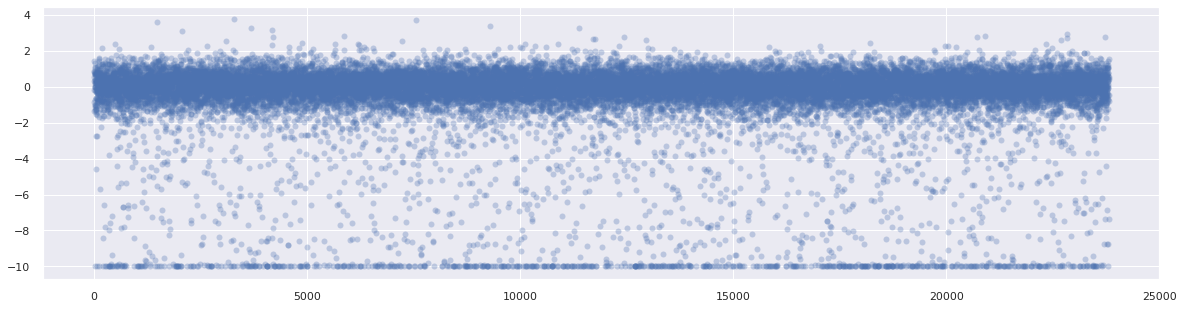

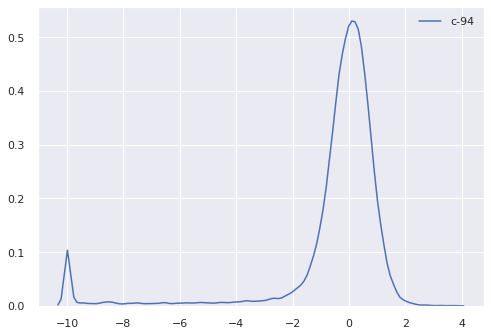

In [212]:
n = 94
plt.figure(figsize=(20, 5))
plt.plot(train_features[f'c-{n}'], 'o', alpha=0.3)
plt.show()
sns.kdeplot(train_features[f'c-{n}'])
plt.show()